# brooklyn-99-episode Analysis

![](https://tse4.mm.bing.net/th?id=OIP.QJxlEMhmS1bUa2fbs6CyjQHaEI&pid=Api&P=0&w=300&h=300)

In [2]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('../input/brooklyn-99-episode-data/brooklyn99_episodes.csv')

In [4]:
data

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0
...,...,...,...,...,...,...,...,...,...
148,8,6,149,The Set Up,Maggie Carey,Jess Dweck & Nick Perdue,2021-08-26,805.0,1450000.0
149,8,7,150,Game of Boyles,Thembi Banks,Paul Welsh & Madeline Walter,2021-09-02,806.0,1840000.0
150,8,8,151,Renewal,Beth McCarthy Miller,Stephanie A. Ritter & Beau Rawlins,2021-09-02,807.0,1310000.0
151,8,9,152,The Last Day Pt 1,Linda Mendoza,Luke Del Tredici & Audrey E. Goodman,2021-09-16,809.0,1880000.0


In [5]:
data.columns

Index(['season', 'episode_num_in_season', 'episode_num_overall', 'title',
       'directed_by', 'written_by', 'original_air_date', 'prod_code',
       'us_viewers'],
      dtype='object')

In [6]:
data.isnull().sum()

season                   0
episode_num_in_season    0
episode_num_overall      0
title                    0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               0
dtype: int64

In [7]:
data[['year','month','day']]=data['original_air_date'].str.split('-',expand=True)

In [8]:
data.columns

Index(['season', 'episode_num_in_season', 'episode_num_overall', 'title',
       'directed_by', 'written_by', 'original_air_date', 'prod_code',
       'us_viewers', 'year', 'month', 'day'],
      dtype='object')

In [9]:
data['year']=data['year'].astype(int)

In [10]:
color = ['#C3073F','#1A1A1D', '#4E4E50', '#C5C6C7', '#6F2232', '#950740']

# How Much Eposide Yealy release?

Text(0.5, 1.0, 'Year of Episodes Distripution')

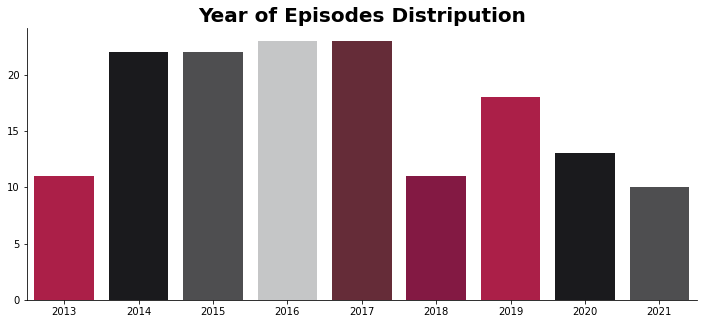

In [11]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x=data['year'].value_counts().index,y=data['year'].value_counts().values,palette=color)
sns.despine()
plt.title('Year of Episodes Distripution',weight='bold',fontsize=20)

# How much Monthly release episode and yealy?

In [12]:
month = data['month'].value_counts().reset_index().sort_values('index',ascending=False)
month.columns=['month','counts']

Text(0.5, 0.98, 'Year & Month Episode Distripution')

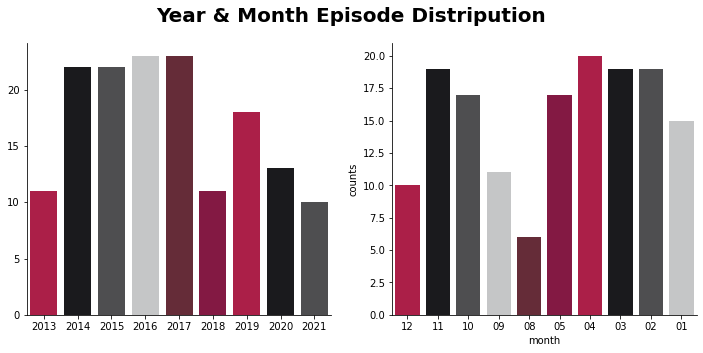

In [13]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x=data['year'].value_counts().index,y=data['year'].value_counts().values,
            ax=ax[0],palette=color)
sns.barplot(x=month['month'],y=month['counts'],ax=ax[1],palette=color)
sns.despine()
plt.suptitle('Year & Month Episode Distripution',weight='bold',fontsize=20)

# Which Director run tha more Episodes?

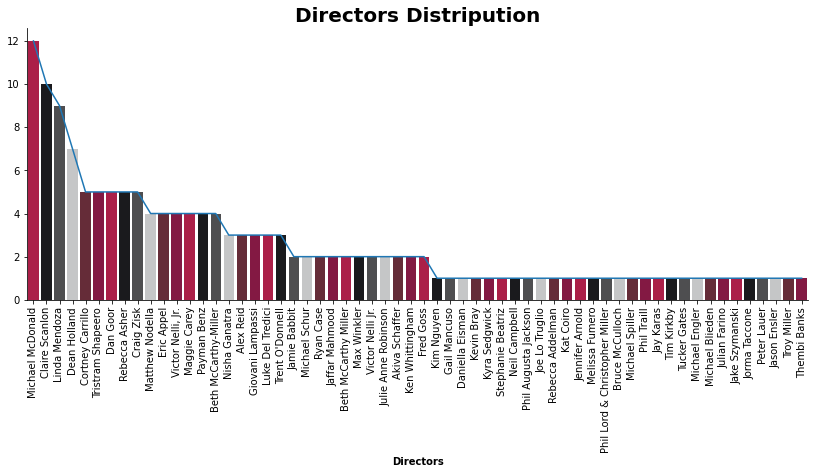

In [14]:
fig = plt.figure(figsize=(14,5))
ax[0]=sns.lineplot(x=data['directed_by'].value_counts().index,y=data['directed_by'].value_counts().values,
             markers='markers')
ax[0]=sns.barplot(x=data['directed_by'].value_counts().index,y=data['directed_by'].value_counts().values
                 ,palette=color,)

ax[0].tick_params(axis='x',rotation=90)
ax[0].set_xlabel('Directors',weight='semibold')
plt.title('Directors Distripution',weight='bold',fontsize=20)
sns.despine()

# Which title of episode more views?

Text(0.5, 1.0, 'Tittle by Viewers')

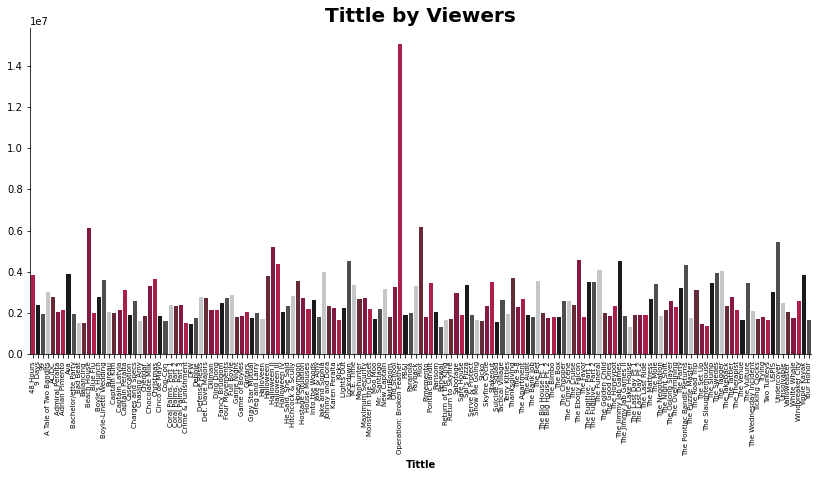

In [15]:
fig = plt.figure(figsize=(14,6))
sns.barplot(x=data.groupby(['title'])['us_viewers'].sum().index,
            y=data.groupby(['title'])['us_viewers'].sum().values,palette=color)
plt.tick_params(axis='x',rotation=90,labelsize=7)
sns.despine()
plt.xlabel('Tittle',weight='semibold')
plt.title('Tittle by Viewers',weight='bold',fontsize=20)


In [16]:
title = data.groupby(['title'])['us_viewers'].sum().reset_index()
title=title['us_viewers']
title=title.astype(int)

Text(0.5, 1.0, 'Episode Views Vs Title Views')

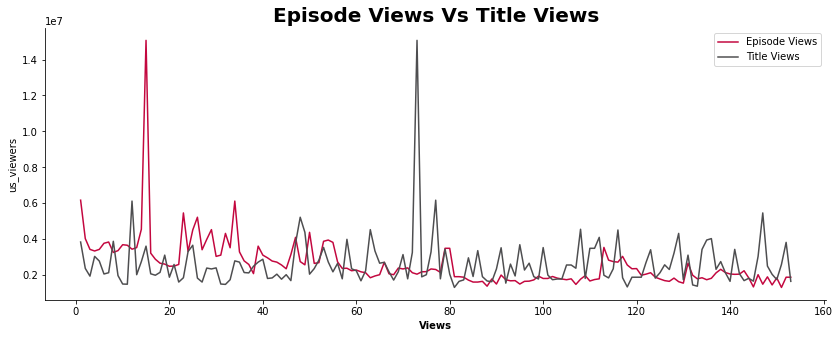

In [17]:

fig = plt.figure(figsize=(14,5))
sns.lineplot(x=data.groupby(['episode_num_overall'])['us_viewers'].sum().index,
            y=data.groupby(['episode_num_overall'])['us_viewers'].sum().values,sizes=20,
             color='#C3073F',label='Episode Views')
sns.lineplot(x=data.groupby(['episode_num_overall'])['us_viewers'].sum().index,
            y=title,color='#4E4E50',label ='Title Views')
sns.despine()
plt.xlabel('Views',weight='bold')
plt.title('Episode Views Vs Title Views',weight='bold',fontsize='20')


# How much  monthly and yearly views?

Text(0.5, 0.98, '% of Yearly Views & Monthly Views')

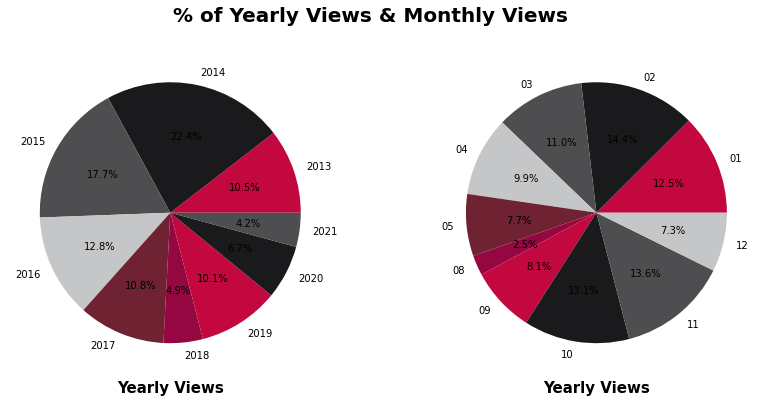

In [18]:
fig,ax= plt.subplots(1,2,figsize=(14,6))
ax[0].pie(data.groupby(['year'])['us_viewers'].sum().values,labels=data.groupby(['year'])['us_viewers'].sum().index,
         colors=color,autopct='%1.1f%%')
ax[1].pie(data.groupby(['month'])['us_viewers'].sum().values,labels=data.groupby(['month'])['us_viewers'].sum().index,
         colors=color,autopct='%1.1f%%')
ax[0].set_xlabel('Yearly Views',weight='semibold',fontsize=15)
ax[1].set_xlabel('Yearly Views',weight='semibold',fontsize=15)
plt.suptitle('% of Yearly Views & Monthly Views',weight='bold',fontsize=20)

# Compare with written and direction episodes?

In [19]:
direct = data.groupby(['directed_by'])['us_viewers'].sum().reset_index()


In [20]:
written = data.groupby(['written_by'])['us_viewers'].sum().reset_index().sort_values('us_viewers',ascending=False)
written=written.drop(written.index[60:65])

In [21]:
number=np.arange(1,61)
number=pd.DataFrame(number)
number.columns=['num']

Text(0.5, 1.0, 'Written Views Vs Direction Views')

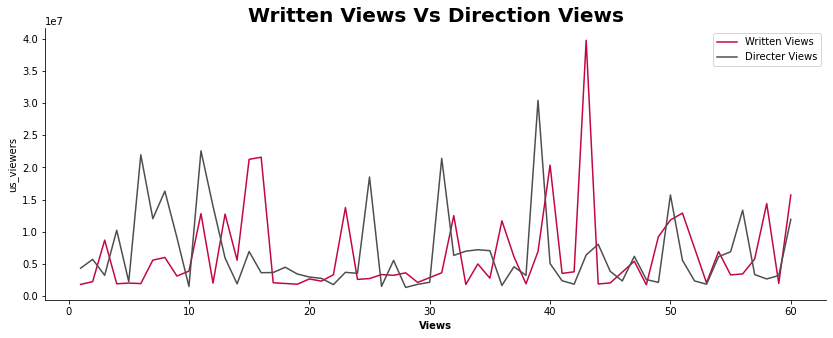

In [22]:

fig = plt.figure(figsize=(14,5))
sns.lineplot(x=number['num'],
            y=written['us_viewers'],sizes=20,
             color='#C3073F',label='Written Views')
sns.despine()
sns.lineplot(x=number['num'],
            y=direct['us_viewers'],sizes=20,
             color='#4E4E50',label='Directer Views')
plt.xlabel('Views',weight='bold')
plt.title('Written Views Vs Direction Views',weight='bold',fontsize='20')
